In [161]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression
import datetime

In [162]:
#get stock
stock = yf.download("GLD","2012-01-01",datetime.datetime.now(),auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [163]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,154.759995,156.300003,154.550003,155.919998,13385800
2012-01-04,155.429993,157.380005,155.339996,156.710007,11549700
2012-01-05,155.369995,158.029999,155.250000,157.779999,11621600
2012-01-06,158.589996,158.630005,156.380005,157.199997,9790500
2012-01-09,157.360001,157.589996,156.190002,156.500000,8771900
...,...,...,...,...,...
2023-05-09,188.119995,189.330002,188.070007,189.020004,7098800
2023-05-10,188.979996,189.639999,187.820007,188.750000,9392100
2023-05-11,188.440002,188.809998,186.860001,187.130005,8245500


In [164]:
#estabilish data frame
df = stock[["Close"]]

In [165]:
df.dropna()

,Close
Date,
2012-01-03,155.919998
2012-01-04,156.710007
2012-01-05,157.779999
2012-01-06,157.199997
2012-01-09,156.500000
...,...
2023-05-09,189.020004
2023-05-10,188.750000
2023-05-11,187.130005


Text(0, 0.5, 'Stock price')

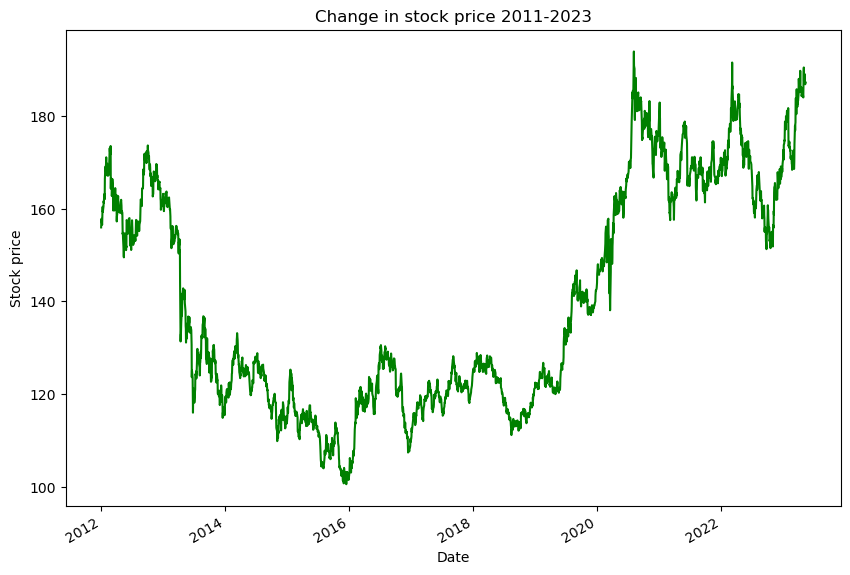

In [166]:
#Visualise change in price over the period
df.Close.plot(figsize=(10,7),color="Green")
plt.title("Change in stock price 2011-2023")
plt.ylabel("Stock price")

In [167]:
#set independent variables
df["3-day moving average"] = df["Close"].rolling(3).mean()
df["9-day moving average"] = df["Close"].rolling(9).mean()
df["Next day price"] = df["Close"].shift(-1)

C:\Users\PC\AppData\Local\Temp\ipykernel_16096\2090381969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["3-day moving average"] = df["Close"].rolling(3).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_16096\2090381969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["9-day moving average"] = df["Close"].rolling(9).mean()
C:\Users\PC\AppData\Local\Temp\ipykernel_16096\2090381969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [207]:
#Drap NANs and assign dependent and independent variable

df = df.dropna()
X = df[["3-day moving average","9-day moving average"]]
Y = df[["Next day price"]]

In [208]:
#Divide data by training set and test set
t= .8
t= int(t*len(df))

X_train_data = X[:t]
Y_train_data = Y[:t]

X_test_data = X[t:]
Y_test_data = Y[t:]

In [209]:
#Apply Linear Regression
lin_reg = LinearRegression().fit(X_train_data, Y_train_data)
print("3-day moving average coefficience: ", lin_reg.coef_[0][0])
print("9-day moving average coefficience: ", lin_reg.coef_[0][1])
print("Intercept: ", lin_reg.intercept_[0])
3

3-day moving average coefficience:  1.1723077574242238
9-day moving average coefficience:  -0.175047595322532
Intercept:  0.36809503267107857


3

Text(0, 0.5, 'Price')

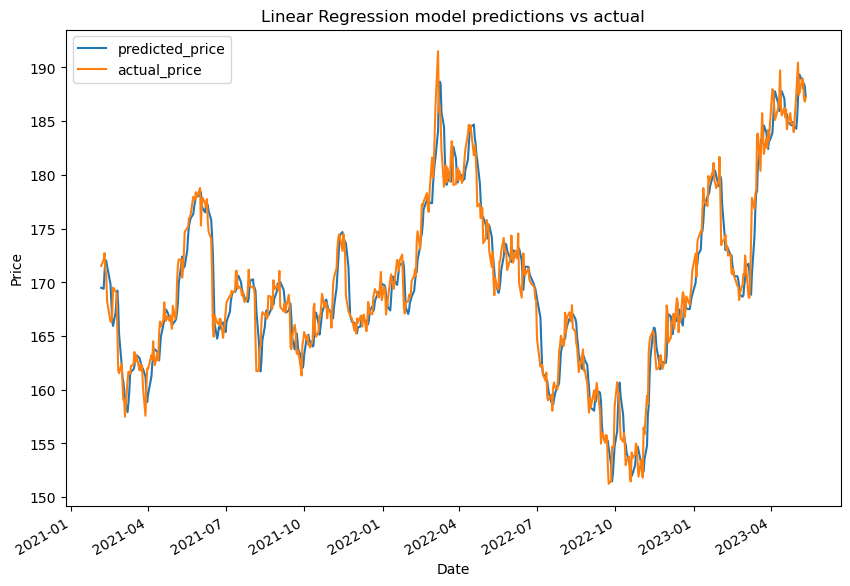

In [210]:
#test model
prediction = lin_reg.predict(X_test_data)
prediction = pd.DataFrame(prediction, index=Y_test_data.index, columns=["price"])

prediction.plot(figsize=(10,7))
plt.plot(Y_test_data)
plt.legend(["predicted_price", "actual_price"])
plt.title("Linear Regression model predictions vs actual")
plt.ylabel("Price")

In [211]:
#chceck goodness of fit
r2_test = lin_reg.score(X[t:],Y[t:])*100
r2_test

94.62957755071322

In [218]:
stock = pd.DataFrame()

stock["TodayPrice"] = df["Close"]
stock["PredictedNextDayPrice"] = prediction["price"]
stock["ActualNextDayPrice"] = Y["Next day price"]
stock["Returns"] = stock["ActualNextDayPrice"].pct_change().shift(1)

In [219]:
stock["Signal"] = np.where(stock["PredictedNextDayPrice"]>stock["PredictedNextDayPrice"].shift(1),1,0)

In [227]:
stock["Algorithm Returns"] = stock["Signal"] * stock["Returns"]

In [234]:
(stock["Algorithm Returns"]+1).cumprod().tail(1)


Date
2023-05-12    3.149493
Name: Algorithm Returns, dtype: float64

Text(0, 0.5, 'Cumulative returns')

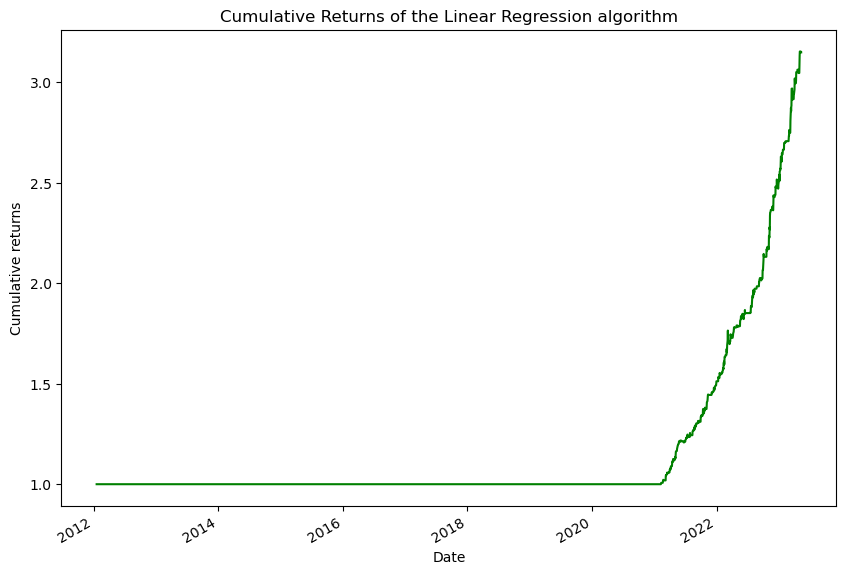

In [237]:
(stock["Algorithm Returns"]+1).cumprod().plot(figsize=(10,7),color="Green")
plt.title("Cumulative Returns of the Linear Regression algorithm")
plt.ylabel("Cumulative returns")